In [52]:
# import desired libraries
# libraries for data processing and analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# libraries for ML modeling
import tensorflow as tf
import tensorflow_hub as hub  #repository of trained ML models

from tensorflow.keras import utils, layers, Sequential

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [4]:
import kaggle
# ignore the warnings if any, if you are running it on the personal computer

In [10]:
# define the constants
DATA_DIR = './data/'  # location to store the data (train, test and validation)
DATASET_NAME = 'gpiosenka/sports-classification' #  location of the kaggle dataset
SEED_VAL = 10  # for the reproducilibty
IMG_SIZE = (224, 224)  # (height, width)
BATCH_SIZE = 16

In [23]:
import os
if not os.path.exists(DATA_DIR):
    kaggle.api.dataset_download_files(DATASET_NAME, path=DATA_DIR, unzip=True)  # download the data

## Data loading and initial observations

In [11]:
tf.random.set_seed(SEED_VAL)
train = utils.image_dataset_from_directory(DATA_DIR+'train', batch_size=BATCH_SIZE, image_size=IMG_SIZE, seed=SEED_VAL)
test = utils.image_dataset_from_directory(DATA_DIR+'test', batch_size=BATCH_SIZE, image_size=IMG_SIZE, seed=SEED_VAL)
valid = utils.image_dataset_from_directory(DATA_DIR+'valid', batch_size=BATCH_SIZE, image_size=IMG_SIZE, seed=SEED_VAL)

Found 13492 files belonging to 100 classes.


2023-09-23 22:40:11.102207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-23 22:40:11.103711: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


In [69]:
def plot_label_frequency(df, title=''):
    class_labels = df.class_names
    class_counts = [0] * len(class_labels)
    
    for _, batch_labels in df:
        for label in batch_labels.numpy():
            class_counts[label] += 1
    print(f"class labels' frequency distribution of {title} images:\n{class_counts}")
    plt.figure(figsize=(20, 5))
    plt.bar(class_labels, class_counts)
    plt.title(f"Class Distribution of {title} Images")
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

class labels' frequency distribution of train images:
[112, 112, 132, 99, 113, 147, 123, 174, 169, 108, 110, 145, 140, 138, 120, 116, 149, 125, 164, 131, 120, 129, 134, 141, 123, 135, 157, 128, 151, 157, 134, 191, 190, 131, 118, 150, 157, 122, 121, 147, 158, 172, 134, 139, 102, 136, 108, 130, 112, 132, 136, 118, 150, 151, 128, 127, 132, 111, 189, 167, 131, 118, 112, 138, 157, 120, 157, 141, 163, 159, 143, 166, 144, 149, 130, 133, 130, 59, 148, 117, 147, 136, 122, 133, 142, 157, 141, 131, 135, 125, 128, 97, 156, 142, 103, 130, 134, 106, 119, 98]


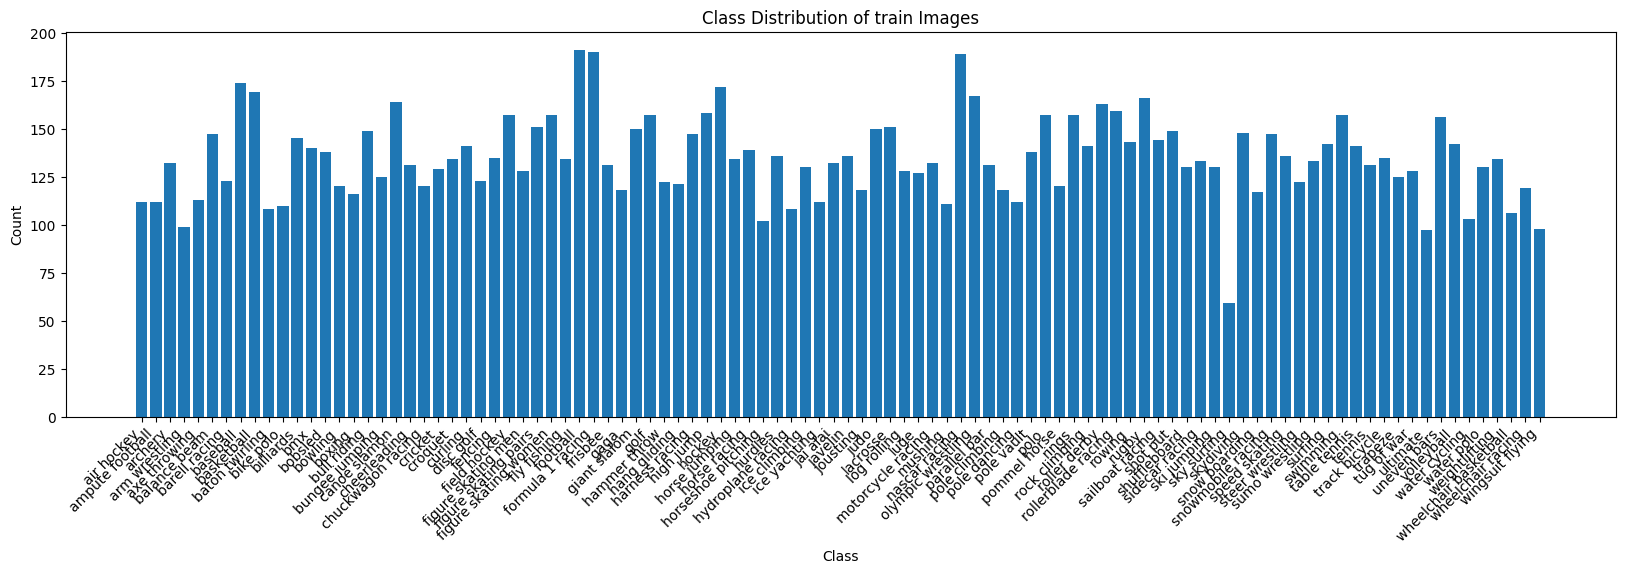

class labels' frequency distribution of test images:
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


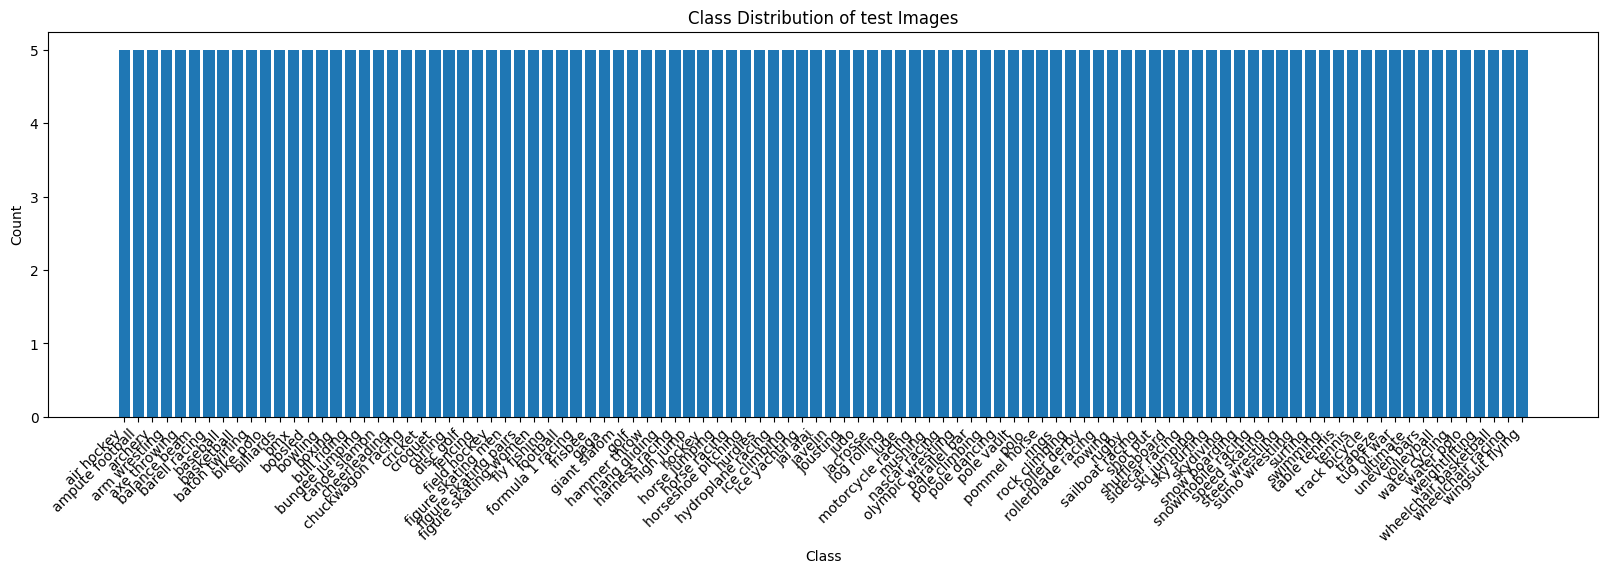

class labels' frequency distribution of validation images:
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


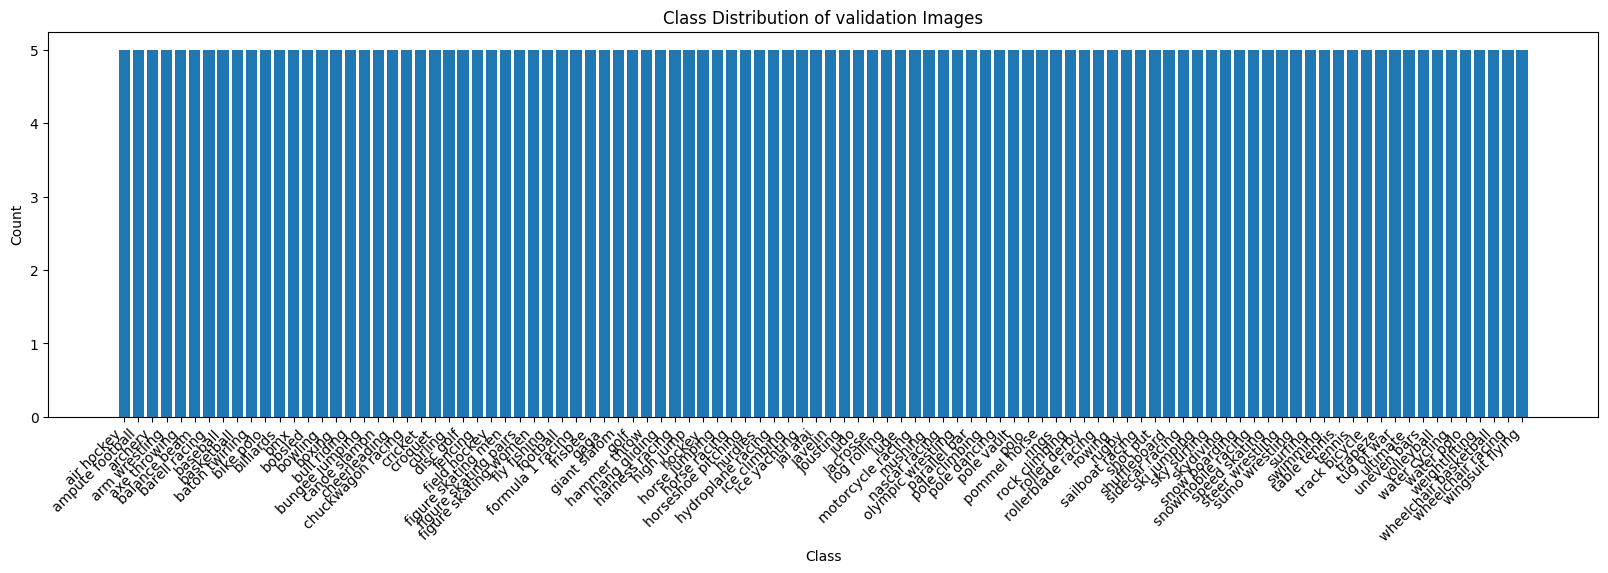

In [70]:
plot_label_frequency(train, title='train')
plot_label_frequency(test, title='test')
plot_label_frequency(valid, title='validation')

In [73]:
assert train.class_names == test.class_names == valid.class_names

**Observations**: 
- Training dataset has class imbalance but not the validation and testing dataset
- The class names across the three datasets is perfectly matching